In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [17]:
labeled_data = "/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Labeled_Data_Only.csv"
gene_exp_df_labeled = pd.read_csv(labeled_data, header=[0]).iloc[:, 1:]
gene_exp_df_labeled



,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.50715,0.60264,0.57725,0.13745,-0.15077,0.38406,0.13014,0.37114,0.12291,0.63100,...,-0.53395,0.25359,-0.32433,0.26583,-0.24402,0.28553,0.20864,-0.68049,-0.47911,-0.78884
1,-0.00914,0.05463,-0.45224,-0.31282,-0.10731,-0.15715,0.08815,-0.23696,0.32343,0.84018,...,-0.40972,-0.37484,-0.43841,-1.34658,-0.46036,1.06535,0.74095,-0.69553,-0.51008,1.14665
2,0.60264,-0.13815,0.07469,0.15237,-0.20953,-0.08262,-0.55791,0.45783,0.02212,-0.18948,...,0.35703,-1.13442,0.06573,-0.83246,0.23607,0.11957,0.14871,-0.81328,0.77592,-0.42403
3,0.33471,-0.42850,-0.57794,0.08815,-0.11336,-0.62383,0.01589,0.73730,-0.04012,-0.34748,...,-0.02662,0.49708,-0.25354,-0.51008,0.17843,0.75458,0.80584,-0.89450,-0.47911,-0.38507
4,-0.10111,0.28111,-0.28099,-0.44019,-0.29659,-0.21634,0.19153,0.15237,-0.18296,-0.08879,...,-0.84556,0.47647,-0.28219,-0.66108,0.07502,-0.61918,0.06258,-1.60345,0.21203,0.28553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.51157,0.08142,-0.16972,-0.83799,-0.14443,-0.04619,0.04136,0.25217,0.55345,0.44184,...,-0.09358,-0.65626,0.87920,0.23958,0.05011,-0.22197,-0.13610,-0.93306,-0.40972,0.65287
11744,-0.13192,0.66232,0.39748,0.18336,0.45783,0.44184,0.24310,-0.00914,0.27132,0.32343,...,0.33780,-0.01748,-1.00214,-0.34091,0.57564,-0.60579,-0.13306,-0.25985,0.21883,-0.14520
11745,-0.14443,-0.57794,-0.20953,-0.02160,-0.22307,-0.76931,0.06124,0.22539,0.78443,-0.06438,...,1.10445,-0.36122,-0.49054,-0.42403,-0.68049,-0.16039,0.67078,0.72449,0.35703,-0.91730
11746,-0.10731,-0.62383,-0.23696,0.51157,-0.45224,-0.29659,-0.44019,-0.13192,0.78443,-0.59982,...,-0.71082,0.36478,0.44329,-0.63742,-1.19130,0.21537,-0.21887,0.57564,-0.55861,0.33780


In [19]:
df_filtered = gene_exp_df_labeled.drop([col for col in gene_exp_df_labeled.columns if 'Loi' in col or 'Ivshina' in col], axis=1)
df_filtered


,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.50715,0.60264,0.57725,0.13745,-0.15077,0.38406,0.13014,0.37114,0.12291,0.63100,...,-0.53395,0.25359,-0.32433,0.26583,-0.24402,0.28553,0.20864,-0.68049,-0.47911,-0.78884
1,-0.00914,0.05463,-0.45224,-0.31282,-0.10731,-0.15715,0.08815,-0.23696,0.32343,0.84018,...,-0.40972,-0.37484,-0.43841,-1.34658,-0.46036,1.06535,0.74095,-0.69553,-0.51008,1.14665
2,0.60264,-0.13815,0.07469,0.15237,-0.20953,-0.08262,-0.55791,0.45783,0.02212,-0.18948,...,0.35703,-1.13442,0.06573,-0.83246,0.23607,0.11957,0.14871,-0.81328,0.77592,-0.42403
3,0.33471,-0.42850,-0.57794,0.08815,-0.11336,-0.62383,0.01589,0.73730,-0.04012,-0.34748,...,-0.02662,0.49708,-0.25354,-0.51008,0.17843,0.75458,0.80584,-0.89450,-0.47911,-0.38507
4,-0.10111,0.28111,-0.28099,-0.44019,-0.29659,-0.21634,0.19153,0.15237,-0.18296,-0.08879,...,-0.84556,0.47647,-0.28219,-0.66108,0.07502,-0.61918,0.06258,-1.60345,0.21203,0.28553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.51157,0.08142,-0.16972,-0.83799,-0.14443,-0.04619,0.04136,0.25217,0.55345,0.44184,...,-0.09358,-0.65626,0.87920,0.23958,0.05011,-0.22197,-0.13610,-0.93306,-0.40972,0.65287
11744,-0.13192,0.66232,0.39748,0.18336,0.45783,0.44184,0.24310,-0.00914,0.27132,0.32343,...,0.33780,-0.01748,-1.00214,-0.34091,0.57564,-0.60579,-0.13306,-0.25985,0.21883,-0.14520
11745,-0.14443,-0.57794,-0.20953,-0.02160,-0.22307,-0.76931,0.06124,0.22539,0.78443,-0.06438,...,1.10445,-0.36122,-0.49054,-0.42403,-0.68049,-0.16039,0.67078,0.72449,0.35703,-0.91730
11746,-0.10731,-0.62383,-0.23696,0.51157,-0.45224,-0.29659,-0.44019,-0.13192,0.78443,-0.59982,...,-0.71082,0.36478,0.44329,-0.63742,-1.19130,0.21537,-0.21887,0.57564,-0.55861,0.33780


In [20]:
study_name_list = []
for name in df_filtered.columns:
    study_name_list.append(name.split(';')[-1])
# print(len(study_name_list))

gene_exp_df_transposed = df_filtered.T
gene_exp_df_transposed.columns = gene_exp_df_transposed.columns.astype(str)
# print(gene_exp_df_transposed.shape)
tsne = TSNE(n_components=2, random_state=0)
gene_exp_2d = tsne.fit_transform(gene_exp_df_transposed)

In [21]:
gene_exp_2d.shape

(3970, 2)

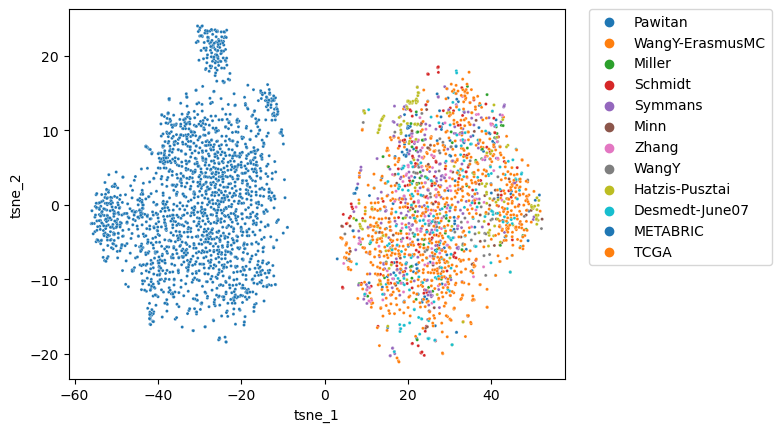

In [22]:
gene_exp_2d_df = pd.DataFrame({'tsne_1': gene_exp_2d[:,0], 'tsne_2': gene_exp_2d[:,1], 'label':study_name_list})
fig, ax = plt.subplots()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=gene_exp_2d_df, s=5, palette='tab10', ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.0)
plt.show()
fig.savefig("tsne_unscaled_buc_all.png", bbox_inches="tight")